<a href="https://colab.research.google.com/github/UrviSoni/pytorch_deeplearning/blob/master/Nueral_Network_With_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:

#Define transform to normalize the data

data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),])

#Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [23]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


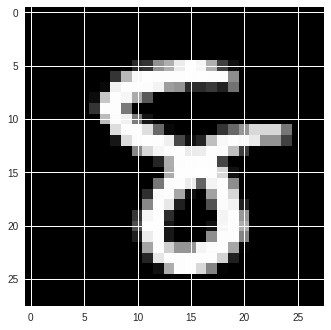

In [24]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');